<a href="https://colab.research.google.com/github/xz76/DNA-Barcode-classification/blob/main/Merged_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Lib


In [ ]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 11.8 MB/s eta 0:00:00


In [ ]:
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 18.1 MB/s eta 0:00:00


In [ ]:
 !pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=edcba9c1d342ede8b6427127184497827c23ae8c8d173862abb495c0f686e106
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator, StatevectorSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector, Operator
import matplotlib.pyplot as plt
import numpy as np

# Problem 1

## 1.1 A quantum circuit using that can solve `10110`

Develop a 6 qubit circuit that reads out on a 5 bit classical register.

In [ ]:
from qiskit import QuantumCircuit,QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute , transpile
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

In [ ]:
qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[4])
circuit.x(qreg_q[5])
circuit.h(qreg_q[5])
circuit.barrier()
circuit.cx(qreg_q[0], qreg_q[5])
circuit.cx(qreg_q[2], qreg_q[5])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.barrier()
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[4])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.measure(qreg_q[3], creg_c[3])
circuit.measure(qreg_q[4], creg_c[4])

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


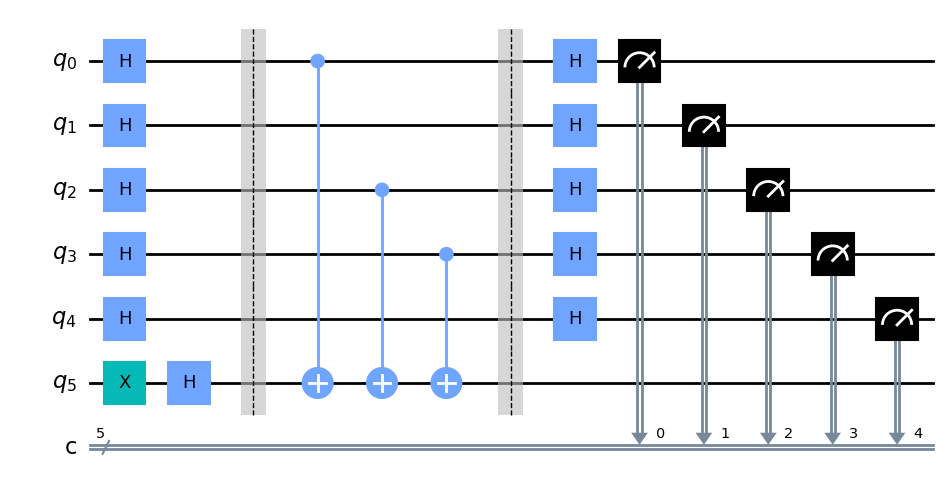

In [ ]:
circuit.draw(output = 'mpl')

{'01101': 1000}


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

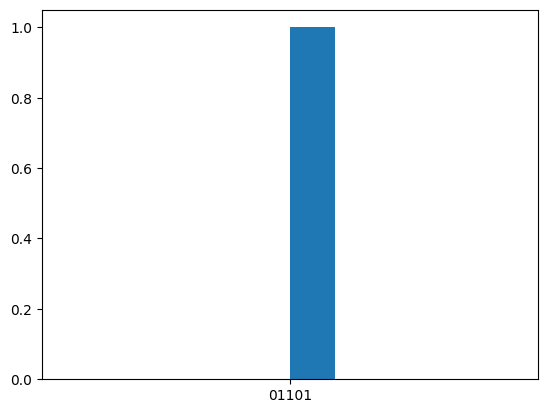

In [ ]:
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
# Grab results from the job
result = job.result()
counts = result.get_counts(compiled_circuit)
circuit.draw(output="mpl")
print(counts)
plt.hist(counts)

# Problem 2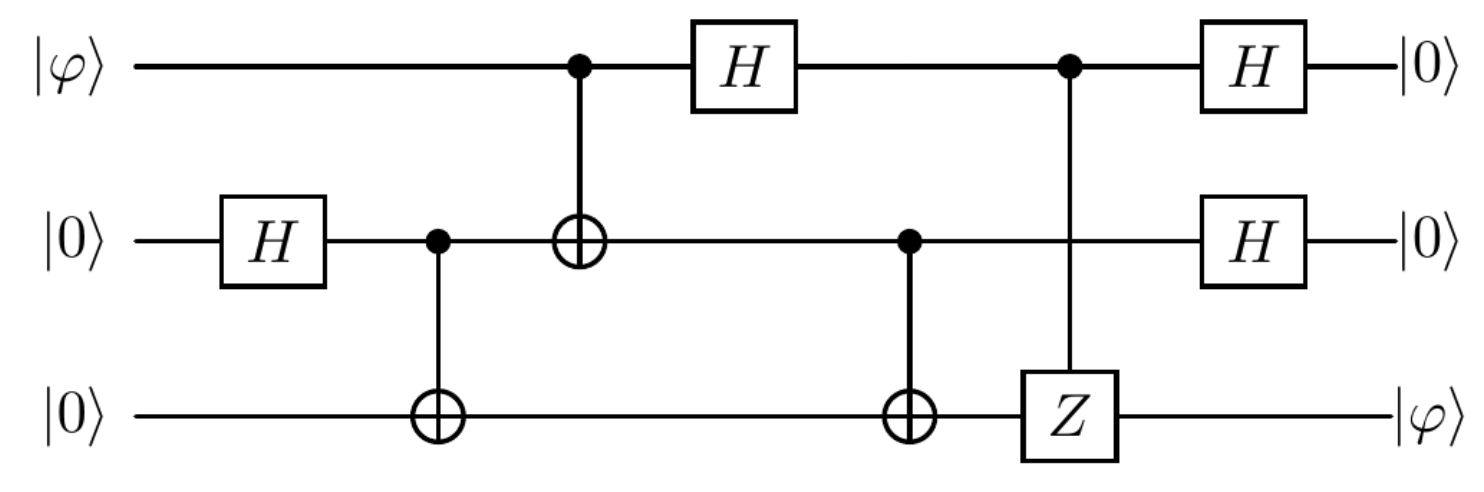

## Steps

In [ ]:
def teleport(VARPHI):
  circuit = QuantumCircuit(3, 3)
  circuit.initialize(VARPHI, 0)

  #circuit
  circuit.h(1)
  circuit.cx(1,2)
  circuit.cx(0,1)
  circuit.h(0)
  circuit.cx(1,2)
  circuit.cz(0,2)
  circuit.h(0)
  circuit.h(1)

  circuit.measure(range(3), range(3))
  display(circuit.draw('mpl'))

  '''
  backend = StatevectorSimulator()
  job = backend.run(circuit)
  result = job.result()
  outputstate = result.get_statevector(circuit, decimals=9)
  display(outputstate.draw('latex'))

  '''
  backend=AerSimulator()
  qc_compiled = transpile(circuit, backend)
  job_sim = backend.run(qc_compiled, shots=1024)
  results = job_sim.result()

  counts = results.get_counts(qc_compiled)
  print(counts)

  display(plot_histogram(counts,figsize=(4,3)))


## Test case 1

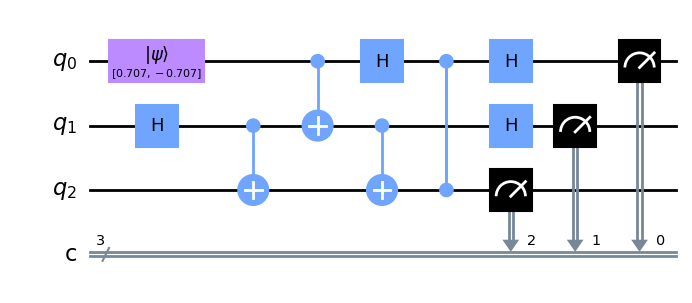

{'000': 511, '100': 513}


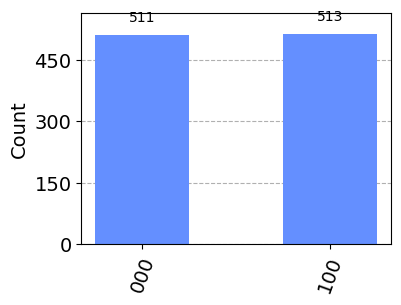

In [ ]:
VARPHI = Statevector([1/np.sqrt(2), -1/np.sqrt(2)])
teleport(VARPHI)

## Test case 2

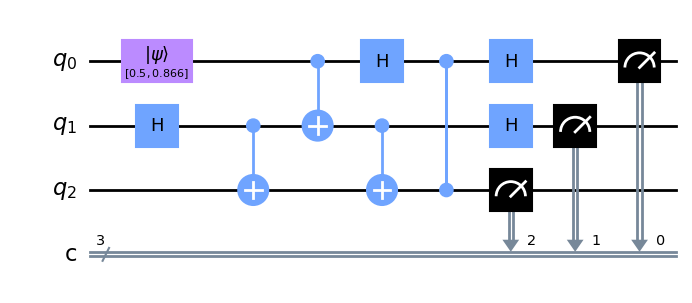

{'000': 257, '100': 767}


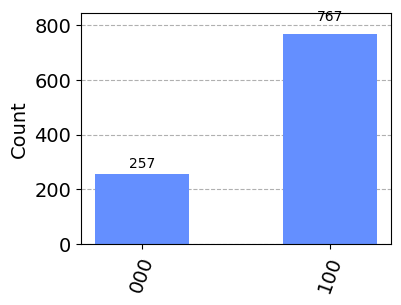

In [ ]:
VARPHI = Statevector([1/2, np.sqrt(3)/2])
teleport(VARPHI)

## Test case 3

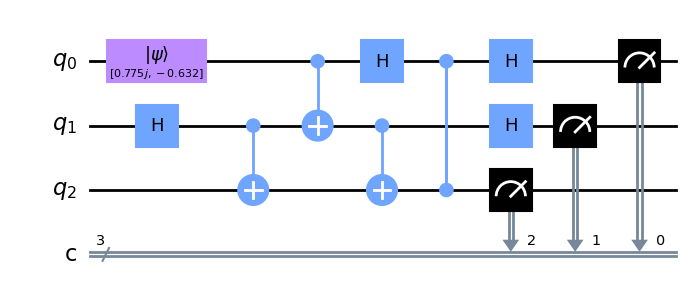

{'100': 401, '000': 623}


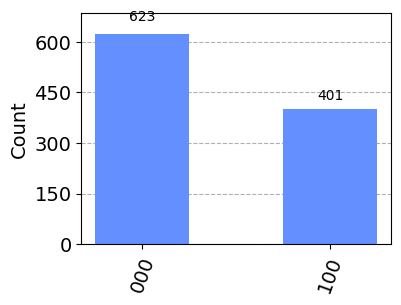

In [ ]:
VARPHI = Statevector([1j*np.sqrt(3)/np.sqrt(5), -np.sqrt(2)/np.sqrt(5)])
teleport(VARPHI)

## Test case 4

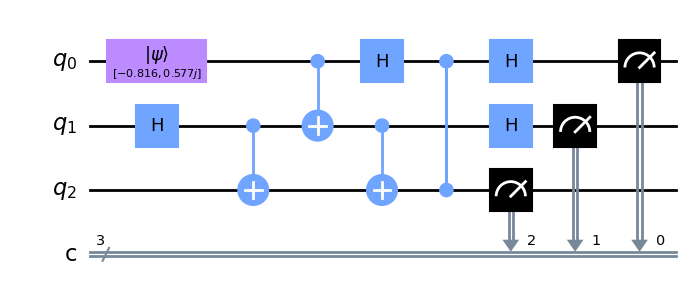

{'000': 683, '100': 341}


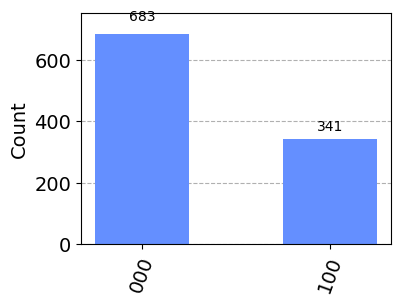

In [ ]:
VARPHI = Statevector([-np.sqrt(6)/3, 1j*np.sqrt(3)/3])
teleport(VARPHI)

# Problem 3

## 3.1 Create a 3-qubit QFT

Create a Quantum Fourier Transform that operates over three qubits.

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


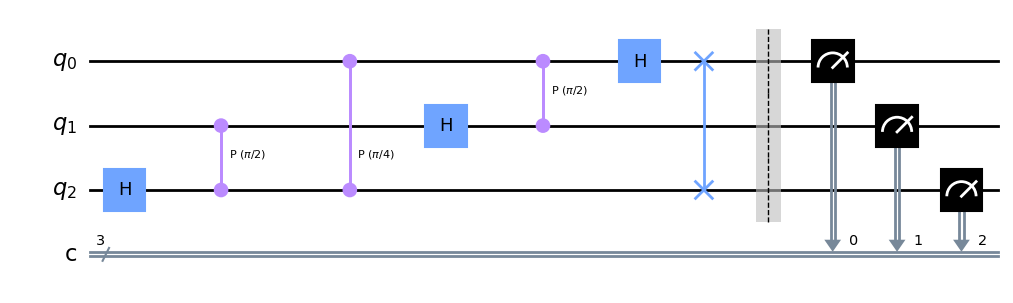

In [ ]:
import numpy as np
from numpy import pi
qc = QuantumCircuit(3, 3)
qc.h(2)
qc.cp(pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.cp(pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.h(1)
qc.cp(pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(0)
qc.swap(0,2)
qc.barrier()
qc.measure(range(3), range(3))
qc.draw(output = 'mpl')

## 3.2 Verify results

{'110': 136, '001': 121, '011': 125, '111': 110, '010': 130, '000': 113, '100': 127, '101': 138}


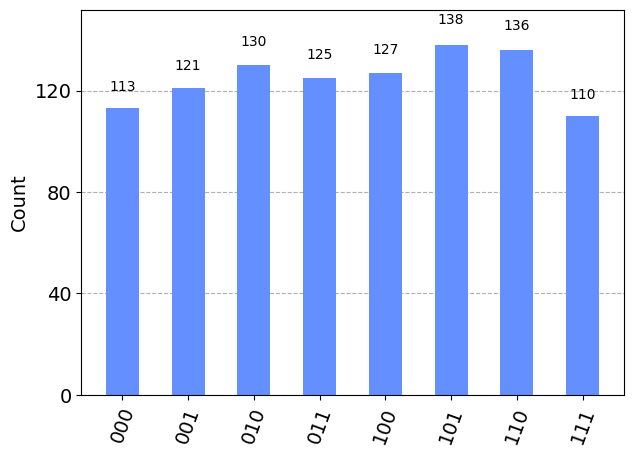

In [ ]:
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1000)
# Grab results from the job
result = job.result()
counts = result.get_counts(compiled_circuit)
circuit.draw(output="mpl")
print(counts)
plot_histogram(counts)

## 3.3 Identify an output

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


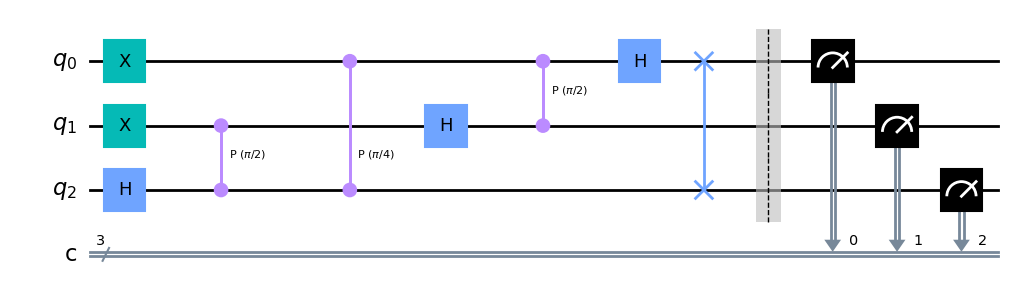

In [ ]:
qc = QuantumCircuit(3, 3)
qc.x(0)
qc.x(1)
qc.h(2)
qc.cp(pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.cp(pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.h(1)
qc.cp(pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(0)
qc.swap(0,2)
qc.barrier()
qc.measure(range(3), range(3))
qc.draw(output = 'mpl')

{'011': 116, '111': 112, '110': 141, '101': 127, '100': 125, '001': 124, '000': 118, '010': 137}


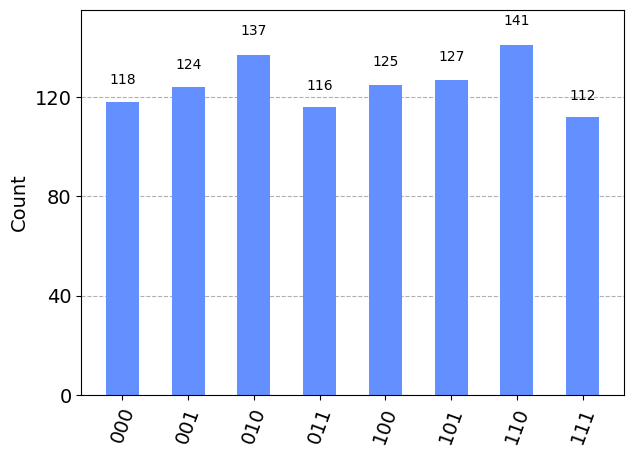

In [ ]:
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1000)
# Grab results from the job
result = job.result()
counts = result.get_counts(compiled_circuit)
circuit.draw(output="mpl")
print(counts)
plot_histogram(counts)

# Bonus Problem

In [ ]:
!pip install qiskit-ibmq-provider
!pip install qiskit-ibm-runtime
!pip install python-dotenv
!pip install qiskit[visualization]

In [ ]:
from qiskit import IBMQ
from dotenv import load_dotenv
import os
from qiskit.test.reference_circuits import ReferenceCircuits
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

In [ ]:
load_dotenv("/content/token.env")
Token=os.getenv("Token")
service = QiskitRuntimeService(channel="ibm_quantum", token=Token)

backend = service.backend("ibmq_qasm_simulator")


In [ ]:
def test(state):
  qc = QuantumCircuit(3, 3)
  qc.h([0, 1, 2])

  if state=="000":
    qc.x([0, 1, 2])
    qc.h(2)
    qc.ccx(0, 1, 2)
    qc.h(2)
    qc.x([0, 1, 2])
  elif state=="001":
    qc.x([0, 1])
    qc.h(2)
    qc.ccx(0, 1, 2)
    qc.h(2)
    qc.x([0, 1])

  elif state=="010":
    qc.x([0, 2])
    qc.h(1)
    qc.ccx(0, 2, 1)
    qc.h(1)
    qc.x([0, 2])

  elif state=="011":
    qc.x(0)
    qc.h(2)
    qc.ccx(0, 1, 2)
    qc.h(2)
    qc.x(0)

  elif state=="100":
    qc.x([1, 2])
    qc.h(0)
    qc.ccx(1, 2, 0)
    qc.h(0)
    qc.x([1, 2])

  elif state=="101":
    qc.x(1)
    qc.h(2)
    qc.ccx(0, 1, 2)
    qc.h(2)
    qc.x(1)

  elif state=="110":
    qc.x(2)
    qc.h(2)
    qc.ccx(0, 1, 2)  # Controlled-Controlled-X (Toffoli gate)
    qc.h(2)
    qc.x(2)
  else:
    qc.h(2)
    qc.ccx(0, 1, 2)
    qc.h(2)


  ####diffusion
  qc.h([0, 1, 2])
  qc.x([0, 1, 2])
  qc.h(2)
  qc.ccx(0, 1, 2)
  qc.h(2)
  qc.x([0, 1, 2])
  qc.h([0, 1, 2])
  display(qc.draw('mpl'))


oracle: 000


/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


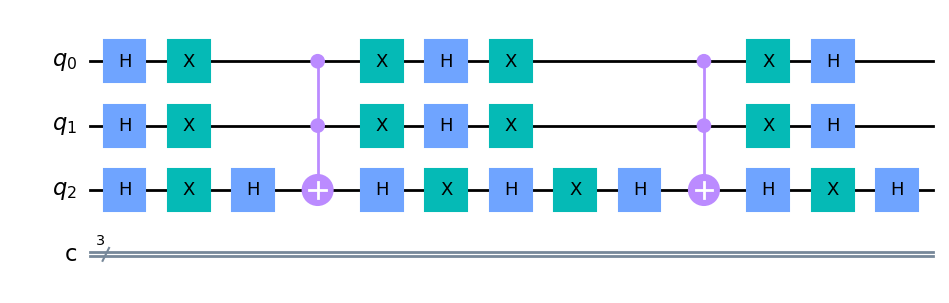

oracle: 001


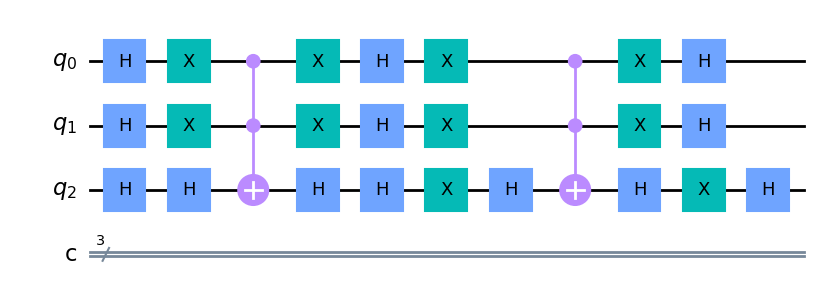

oracle: 010


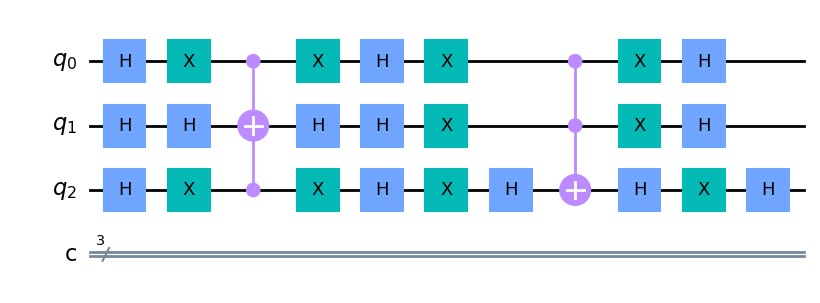

oracle: 011


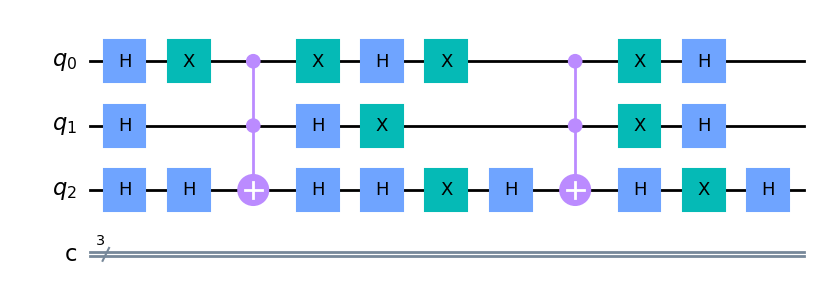

oracle: 100


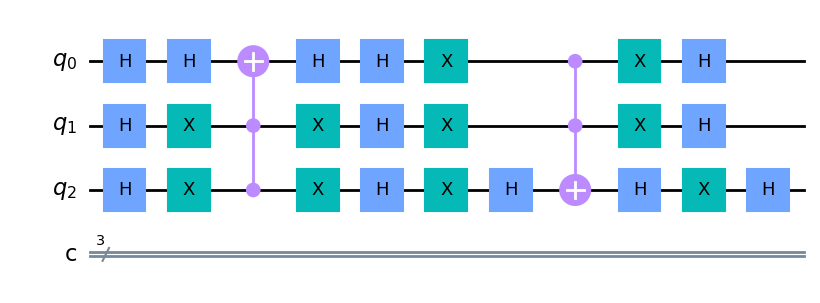

oracle: 101


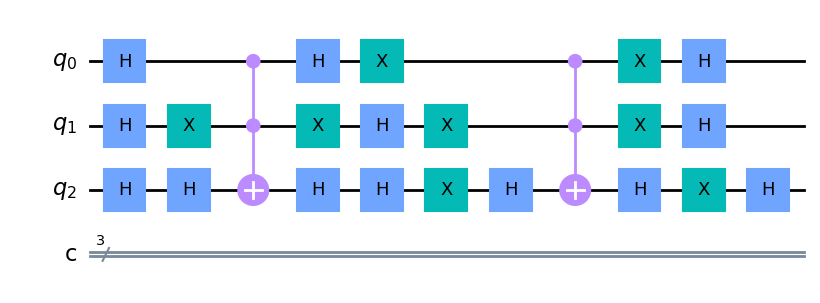

oracle: 110


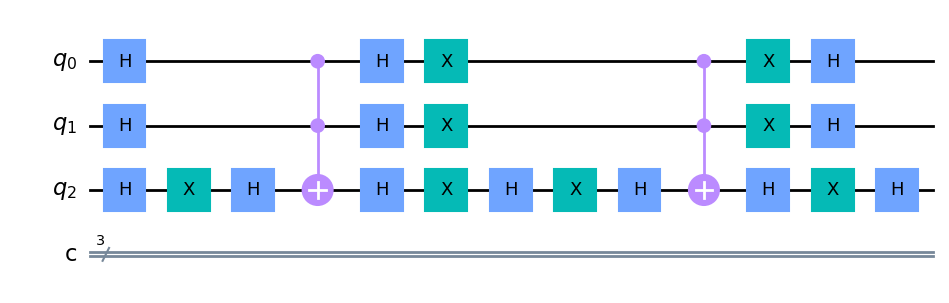

oracle: 111


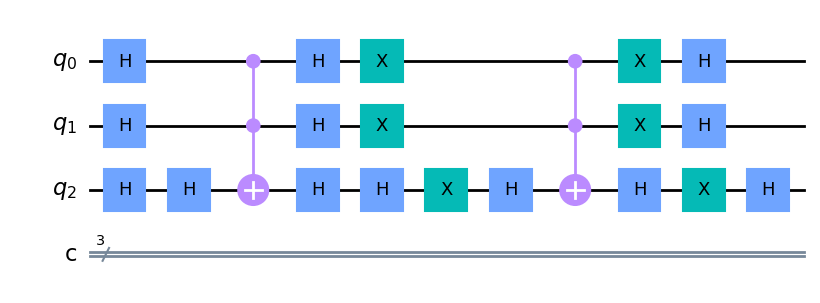

In [ ]:
list = ["000", "001","010","011","100","101","110","111"]

for i in list:
  print("oracle:",i)
  test(i)

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


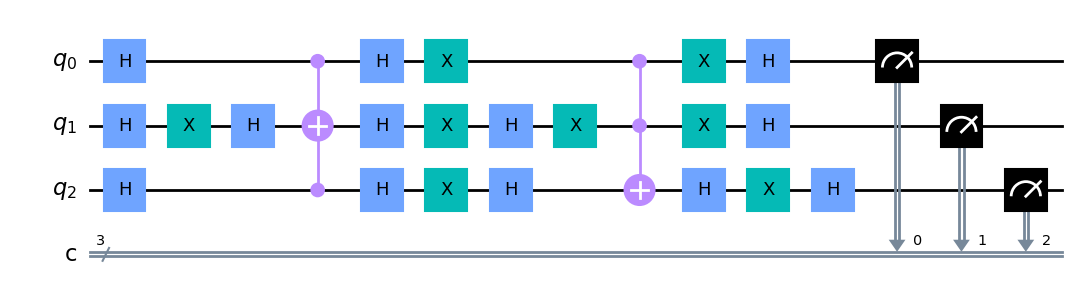

job id: cllotkq1r5ohufe3n0o0
Job Status: job has successfully run
{'101': 3143, '001': 122, '010': 132, '110': 104, '100': 105, '111': 144, '000': 124, '011': 126}


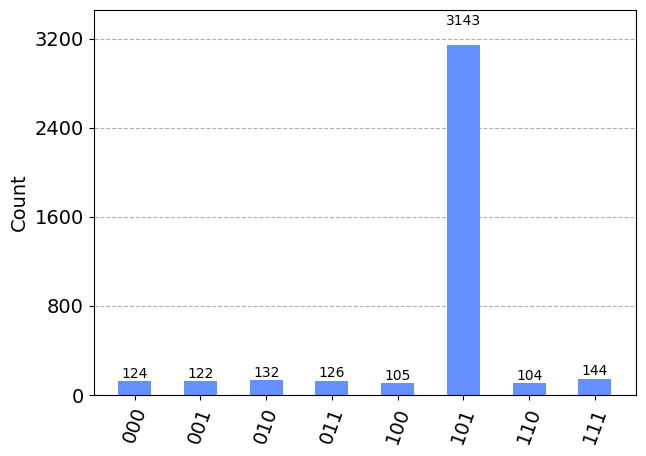

In [ ]:
circult = QuantumCircuit(3, 3)
circult.h([0, 1, 2])  # Apply Hadamard to all qubits

####101
# Apply X-gate to flip the 2nd qubit (to target '0' in '101')
circult.x(1)

# Multi-controlled-Z gate (or equivalent) targeting '101'
# Control on qubits 0 and 2, target on qubit 1
circult.h(1)
circult.ccx(0, 2, 1)  # Controlled-Controlled-X (Toffoli gate)
circult.h(1)

# Flip the 2nd qubit back
circult.x(1)

####diffusion

# Apply Hadamard to all qubits
circult.h([0, 1, 2])

# Apply X to all qubits
circult.x([0, 1, 2])

# Multi-controlled-Z gate
circult.h(2)
circult.ccx(0, 1, 2)  # Controlled-Controlled-X (Toffoli gate)
circult.h(2)

# Apply X and Hadamard to all qubits again
circult.x([0, 1, 2])
circult.h([0, 1, 2])


#### Measure and Execute
circult.measure([0, 1, 2], [0, 1, 2])
display(circult.draw('mpl'))

# Compile and run
compiled_circuit = transpile(circult, backend)
job = backend.run(compiled_circuit)
print(f"job id: {job.job_id()}")
job_monitor(job)

# Get results
result = job.result()
counts = result.get_counts(circult)
print(counts)
plot_histogram(counts)
